<a href="https://colab.research.google.com/github/rameshboggu36/credit_card_fraud_detection/blob/master/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Credit Card Data Fraud Detection__:

* Develop a Machine Learning model to detect the fraudlent transactions from the data set of credit card transaction details.
* Find the best model suitable to the objective by employing model selection methods.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/creditcard.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# __Data Preprocessing__:

* __Understanding the Data:__

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


* __we can see all the columns are of numerical type and only the output column is categorical. Among the numerical columns, only the Time and amount columns are of known attributes, remaining columns are transformed columns from the sensitive details of credit card transactions.__

* __Handling missing values__:

In [7]:
df.isnull().sum()*100/len(df)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [8]:
df.duplicated().sum()

1081

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(283726, 31)

# __Visualizing the data:__

* __Univariate Analysis__:

In [12]:
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


* Numerical (Time)

In [13]:
print("   Descriptive Statistics of \nTime:")
print(df['Time'].describe())

   Descriptive Statistics of 
Time:
count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64


Text(0.95, 0.95, 'Skewness: -0.04')

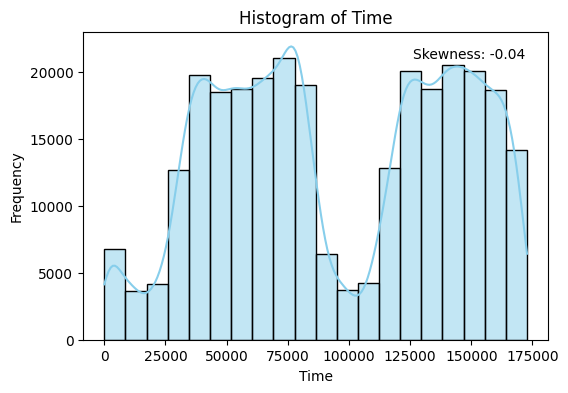

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Time', bins=20, kde=True, color='skyblue')
plt.title('Histogram of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
skewness = df['Time'].skew()
plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')

* __the distribution of Time is having a bimodal distribution__

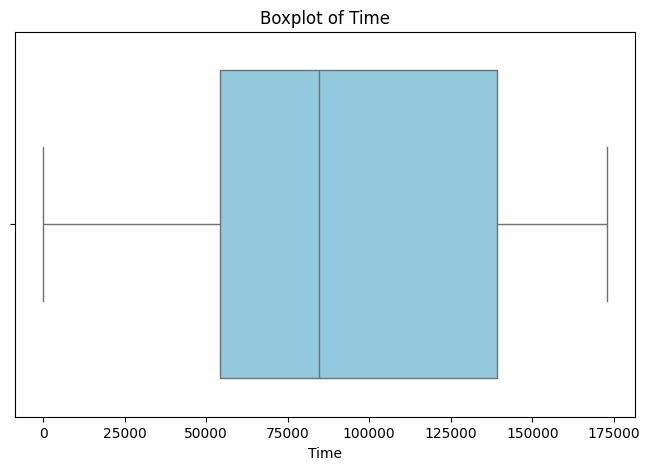

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Time', color='skyblue')
plt.title('Boxplot of Time')
plt.xlabel('Time')
stats = df['Time'].describe()

<ipython-input-16-98c4c4496923>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Time', shade=True, color='skyblue')


Text(0, 0.5, 'Density')

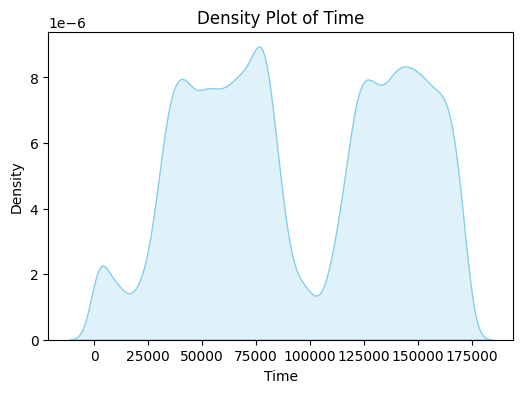

In [16]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Time', shade=True, color='skyblue')
plt.title('Density Plot of Time')
plt.xlabel('Time')
plt.ylabel('Density')

In [17]:
time_in_days = (df['Time'].iloc[-1])/(60*60*24)
print(f'Number of days the transactions were taken: {round(time_in_days)} days')

Number of days the transactions were taken: 2 days


* Numerical (Amount)

In [18]:
print("   Descriptive Statistics of \nTime:")
print(df['Amount'].describe())

   Descriptive Statistics of 
Time:
count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64


Text(0.95, 0.95, 'Skewness: 16.98')

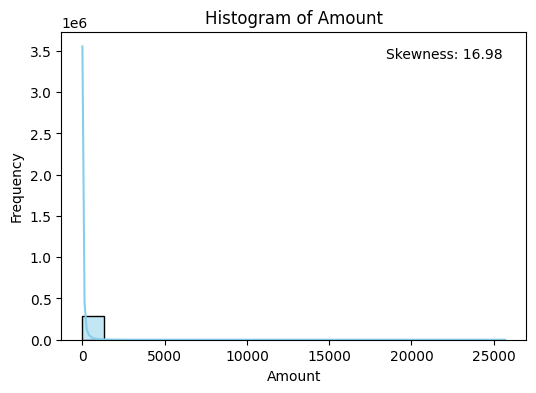

In [19]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Amount', bins=20, kde=True, color='skyblue')
plt.title('Histogram of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
skewness = df['Amount'].skew()
plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')

* __the distribution of Amount is highly right skewed.__

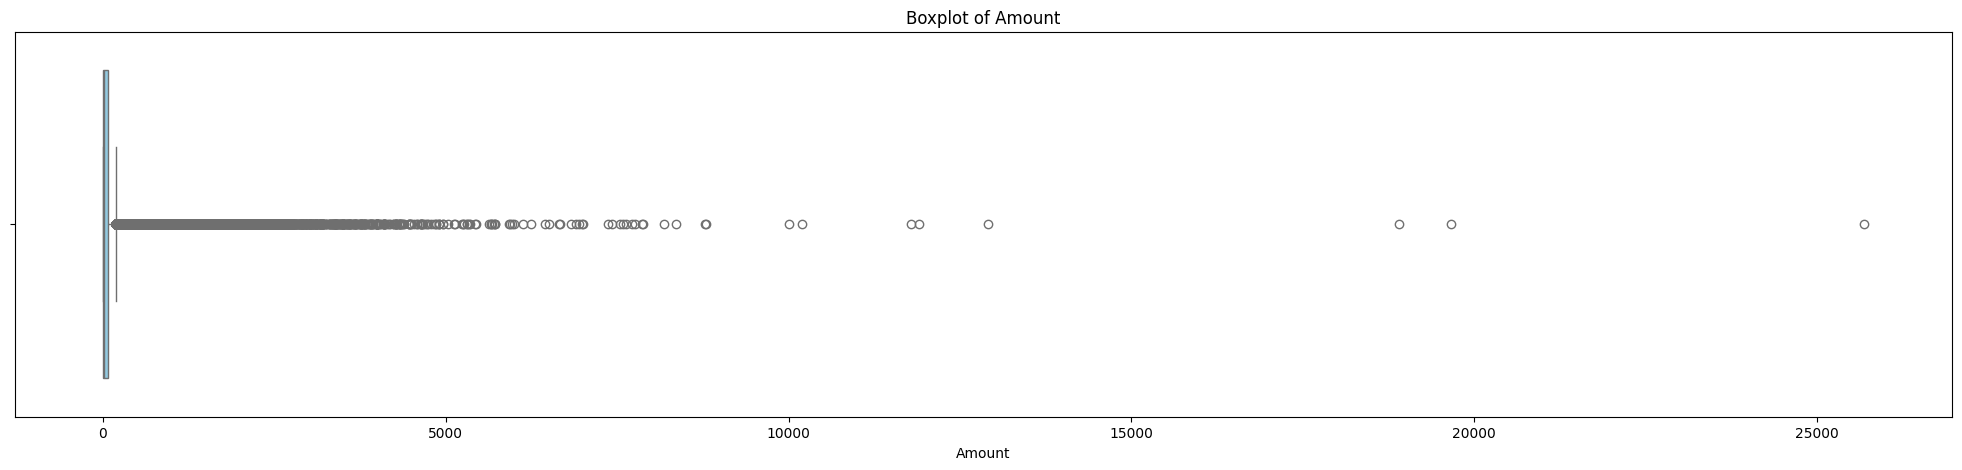

In [20]:
plt.figure(figsize=(25,5))
sns.boxplot(data=df, x='Amount', color='skyblue')
plt.title('Boxplot of Amount')
plt.xlabel('Amount')
stats = df['Amount'].describe()

In [21]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Fence:", lower_fence)
print("Upper Fence:", upper_fence)

Q1: 5.6
Q3: 77.51
IQR: 71.91000000000001
Lower Fence: -102.26500000000001
Upper Fence: 185.375


<ipython-input-22-aff62eb8f8aa>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Amount', shade=True, color='skyblue')


Text(0, 0.5, 'Density')

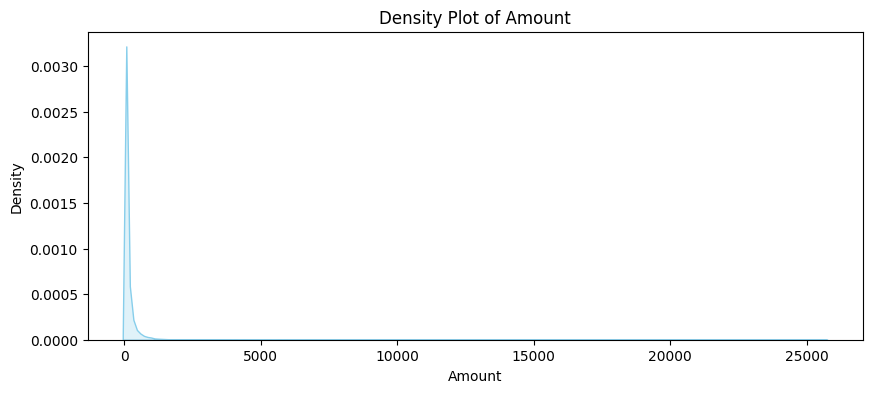

In [22]:
plt.figure(figsize=(10, 4))
sns.kdeplot(data=df, x='Amount', shade=True, color='skyblue')
plt.title('Density Plot of Amount')
plt.xlabel('Amount')
plt.ylabel('Density')

* Categorical (Class)

<ipython-input-23-033d0ec195d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='Set2')


Text(0, 0.5, 'Frequency')

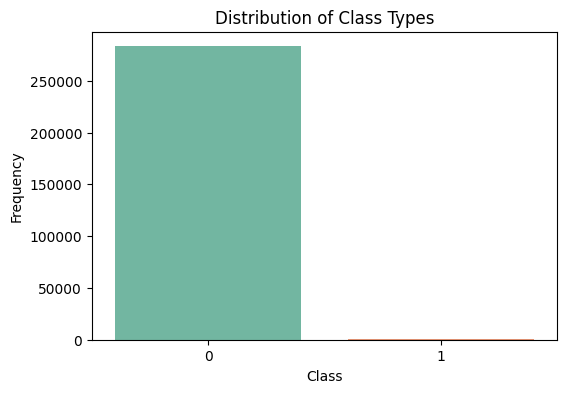

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class', palette='Set2')
plt.title('Distribution of Class Types')
plt.xlabel('Class')
plt.ylabel('Frequency')

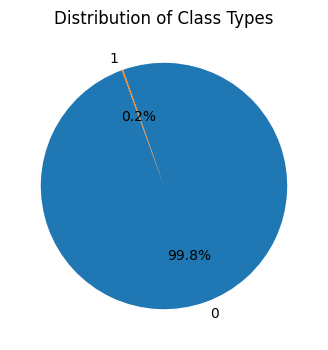

In [24]:
route_type_counts = df['Class'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(route_type_counts, labels=route_type_counts.index, autopct='%1.1f%%', startangle=110)
plt.title('Distribution of Class Types')
plt.show()

* __Bivariate Analysis__:

* Numerical - Categorical (Amount - Class)

<ipython-input-25-cbbea8803d78>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Class', y='Amount', palette='Set2')


Text(0, 0.5, 'Amount')

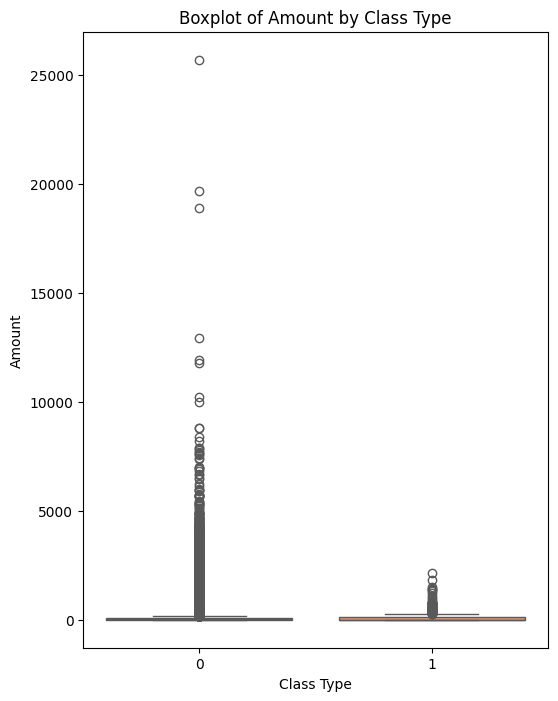

In [25]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, x='Class', y='Amount', palette='Set2')
plt.title('Boxplot of Amount by Class Type')
plt.xlabel('Class Type')
plt.ylabel('Amount')

<ipython-input-26-cb46a4cc3811>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Class', y='Amount', palette='Set2')


Text(0, 0.5, 'Amount')

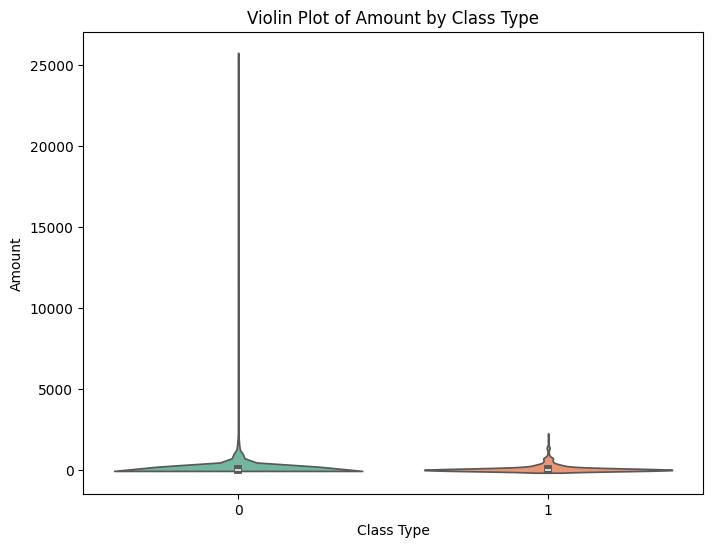

In [26]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Class', y='Amount', palette='Set2')
plt.title('Violin Plot of Amount by Class Type')
plt.xlabel('Class Type')
plt.ylabel('Amount')

* As we found there are outliers present in Amount category, we try to impute or remove those values, but to __avoid data leakage__ we split the data set into training and test datasets.

* before splitting into training and test data, we do undersampling as we can see the data is highly imbalanced.

In [81]:
X = df.drop('Class', axis=1)
y = df['Class']

In [84]:
pd.value_counts(y)

Class
0    283253
1       473
Name: count, dtype: int64

In [85]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [86]:
legit_sam = legit.sample(n=len(fraud))

In [89]:
under_sample = pd.concat([legit_sam, fraud], axis=0)

In [90]:
len(under_sample)

946

In [95]:
X = under_sample.drop('Class', axis=1)
y = under_sample['Class']

In [27]:
from sklearn.model_selection import train_test_split

In [96]:
train_df, test_df = train_test_split(under_sample, test_size=0.2,stratify=y, random_state=42)

In [97]:
len(train_df)

756

In [98]:
len(test_df)

190

* now we will find the range for outliers in training data and make changes based on that in both train and test data.

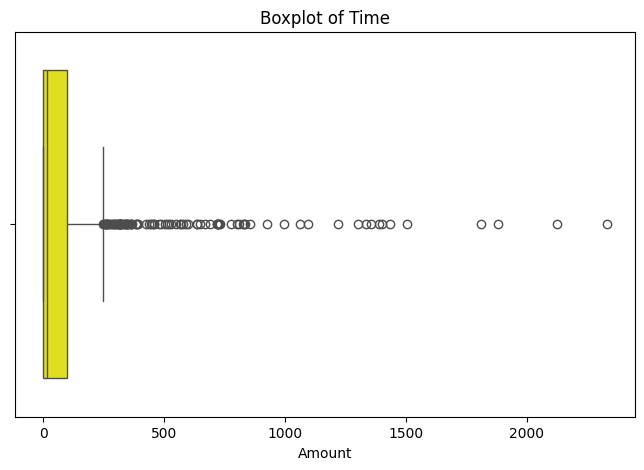

In [99]:
plt.figure(figsize=(8,5))
sns.boxplot(data=train_df, x='Amount', color='yellow')
plt.title('Boxplot of Time')
plt.xlabel('Amount')
stats = train_df['Amount'].describe()

In [100]:
Q1 = train_df['Amount'].quantile(0.25)
Q3 = train_df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Fence:", lower_fence)
print("Upper Fence:", upper_fence)

Q1: 1.5350000000000001
Q3: 99.99
IQR: 98.455
Lower Fence: -146.1475
Upper Fence: 247.6725


In [101]:
outliers_iqr = (train_df['Amount'] < lower_fence) | (train_df['Amount'] > upper_fence)
print(outliers_iqr.sum()*100/len(train_df))

12.301587301587302


* __we have to check these outliers are really outliers or fraud transactions__:

In [102]:
train_df[train_df['Class']==0]['Amount'].describe()

count     378.000000
mean       88.544894
std       219.780672
min         0.000000
25%         6.000000
50%        19.995000
75%        78.862500
max      2329.520000
Name: Amount, dtype: float64

In [103]:
train_df[train_df['Class']==1]['Amount'].describe()

count     378.000000
mean      135.147275
std       281.142413
min         0.000000
25%         1.000000
50%        10.345000
75%       112.420000
max      2125.870000
Name: Amount, dtype: float64

* __not proceeding with any kind of removing the outliers or imputing them with other values because, this amount has relationship with the final output class, and by removing this outlier might effect the performance of the model.__

<ipython-input-104-7e7d87748654>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train_df, x='Amount', shade=True, color='skyblue')


Text(0.95, 0.95, 'Skewness: 4.44')

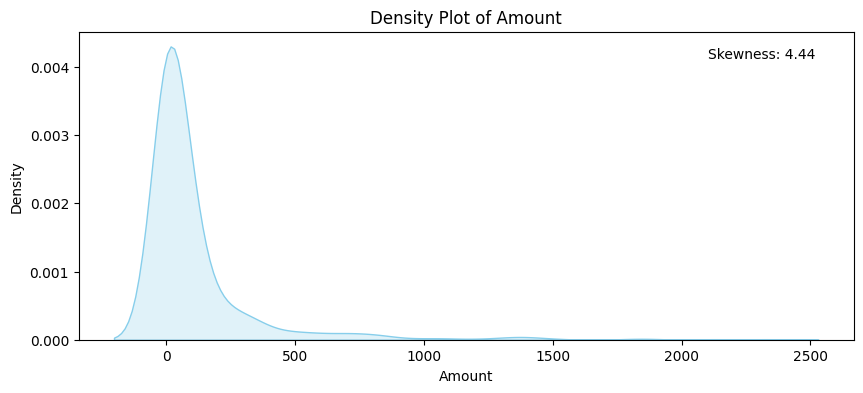

In [104]:
plt.figure(figsize=(10, 4))
sns.kdeplot(data=train_df, x='Amount', shade=True, color='skyblue')
plt.title('Density Plot of Amount')
plt.xlabel('Amount')
plt.ylabel('Density')
skewness = train_df['Amount'].skew()
plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')

In [105]:
import statsmodels.api as sm

Text(0, 0.5, 'Sample Quantiles')

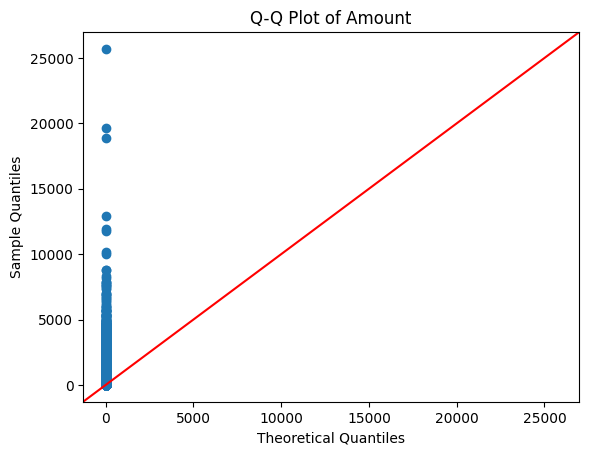

In [106]:
sm.qqplot(df['Amount'], line ='45')
plt.title('Q-Q Plot of Amount')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

In [107]:
from scipy import stats
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
train_df['Amount_log'] = pt.fit_transform(train_df[['Amount']])
test_df['Amount_log'] = pt.transform(test_df[['Amount']])

<ipython-input-108-415d77e3d762>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train_df, x='Amount_log', shade=True, color='skyblue')


Text(0.95, 0.95, 'Skewness: 0.06')

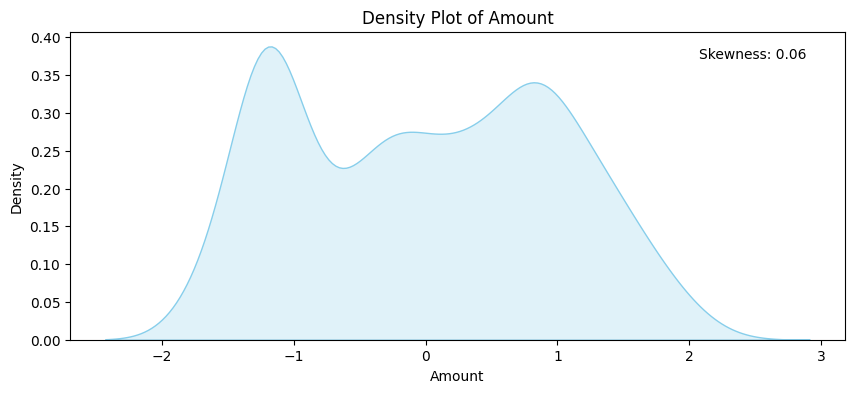

In [108]:
plt.figure(figsize=(10, 4))
sns.kdeplot(data=train_df, x='Amount_log', shade=True, color='skyblue')
plt.title('Density Plot of Amount')
plt.xlabel('Amount')
plt.ylabel('Density')
skewness = train_df['Amount_log'].skew()
plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')

Text(0, 0.5, 'Sample Quantiles')

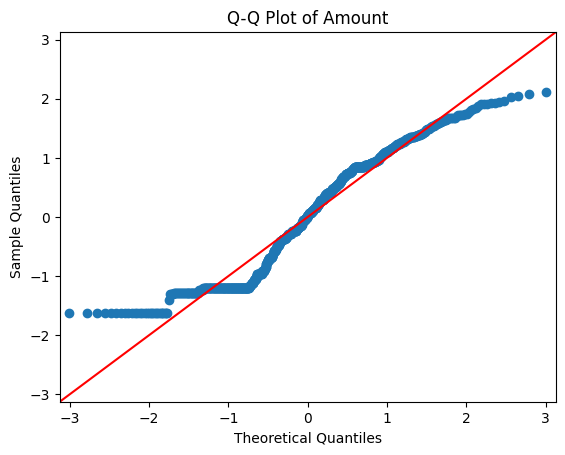

In [109]:
sm.qqplot(train_df['Amount_log'], line ='45')
plt.title('Q-Q Plot of Amount')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

* by using yeo-johnson power transformation, we reduced the skewness of the column Amount and brought it close to symmetry.

* __similarly for test data also transformed the amount column:__

<ipython-input-110-7a410184dcff>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=test_df, x='Amount', shade=True, color='skyblue')


Text(0.95, 0.95, 'Skewness: 5.03')

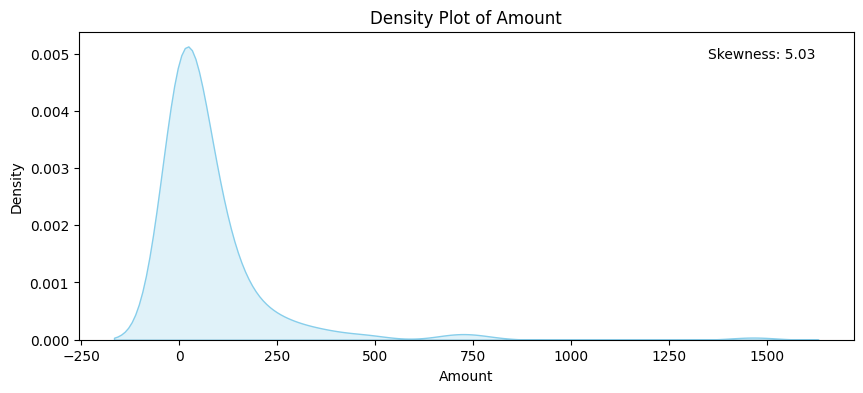

In [110]:
plt.figure(figsize=(10, 4))
sns.kdeplot(data=test_df, x='Amount', shade=True, color='skyblue')
plt.title('Density Plot of Amount')
plt.xlabel('Amount')
plt.ylabel('Density')
skewness = test_df['Amount'].skew()
plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')

Text(0, 0.5, 'Sample Quantiles')

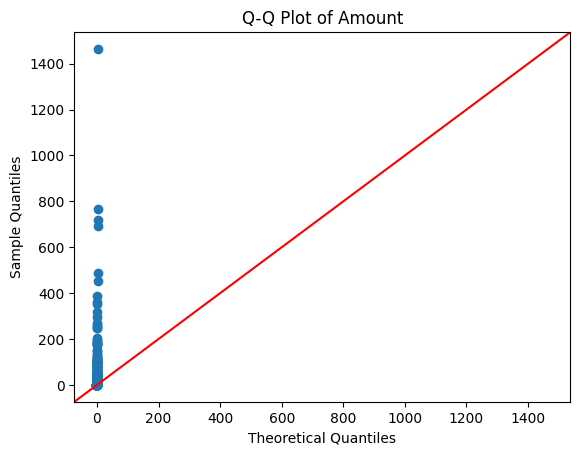

In [111]:
sm.qqplot(test_df['Amount'], line ='45')
plt.title('Q-Q Plot of Amount')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

<ipython-input-112-7be30679f3b5>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=test_df, x='Amount_log', shade=True, color='skyblue')


Text(0.95, 0.95, 'Skewness: -0.06')

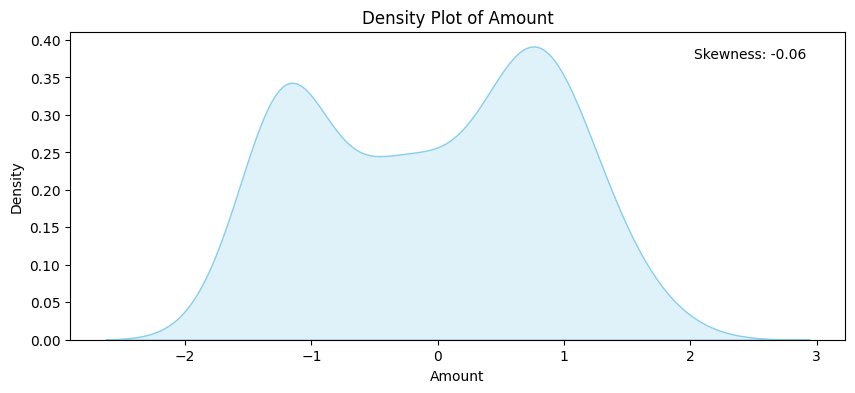

In [112]:
plt.figure(figsize=(10, 4))
sns.kdeplot(data=test_df, x='Amount_log', shade=True, color='skyblue')
plt.title('Density Plot of Amount')
plt.xlabel('Amount')
plt.ylabel('Density')
skewness = test_df['Amount_log'].skew()
plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')

Text(0, 0.5, 'Sample Quantiles')

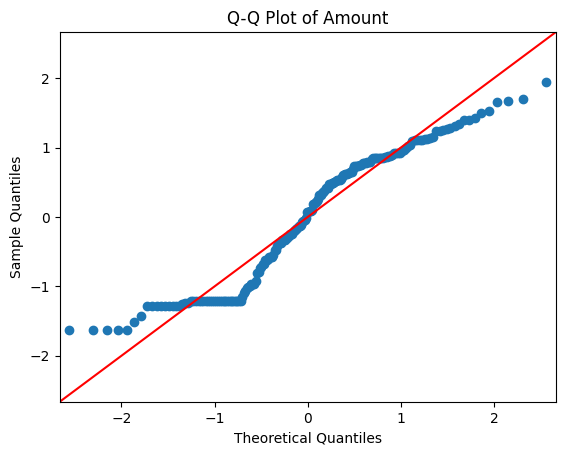

In [113]:
sm.qqplot(test_df['Amount_log'], line ='45')
plt.title('Q-Q Plot of Amount')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

* __Feature Scaling__:

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

* as the each attribute is of different scale, it is ideal to scale each attribute to a similar scale.

* __Before scaling, lets separate the dataframes into input and output variables X and y.__

In [115]:
X_train = train_df.drop(['Class','Amount'], axis=1)
y_train = train_df['Class']
X_test = test_df.drop(['Class','Amount'], axis=1)
y_test = test_df['Class']

In [116]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [118]:
X_train_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,0.032602,0.964804,0.319735,0.910437,0.276471,0.666294,0.474843,0.817703,0.657861,0.785977,...,0.281408,0.432814,0.464238,0.786979,0.599000,0.718771,0.316820,0.633581,0.470053,0.269774
1,0.786029,0.963876,0.409247,0.726375,0.594917,0.712455,0.327546,0.803078,0.662162,0.572670,...,0.306567,0.442943,0.466181,0.782765,0.750868,0.739643,0.317032,0.697343,0.568267,0.000000
2,0.361106,0.741426,0.470021,0.888738,0.208088,0.637830,0.778122,0.711246,0.385114,0.779379,...,0.051084,0.767798,0.179210,0.878269,0.533133,0.681568,0.378624,0.736093,0.572958,0.328303
3,0.010121,0.964998,0.310964,0.911900,0.259382,0.658468,0.475667,0.817774,0.660062,0.723664,...,0.279171,0.436280,0.475895,0.787343,0.620926,0.718130,0.327493,0.635421,0.467700,0.135393
4,0.802578,0.926817,0.334805,0.920125,0.208236,0.666830,0.383478,0.839610,0.655756,0.724503,...,0.281376,0.436911,0.494718,0.790918,0.910600,0.600122,0.323325,0.669122,0.498315,0.166489


In [119]:
X_train_scaled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.523754,0.860544,0.358903,0.799742,0.378740,0.619113,0.453749,0.767280,0.669915,0.667458,...,0.296595,0.446160,0.517907,0.782037,0.609333,0.686110,0.314336,0.653028,0.477696,0.435411
std,0.288260,0.165683,0.114414,0.176805,0.203039,0.126395,0.135250,0.109826,0.067974,0.125946,...,0.067572,0.040758,0.056876,0.047221,0.172636,0.097049,0.122709,0.103538,0.120306,0.266832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.274746,0.844378,0.296152,0.755183,0.227840,0.613759,0.384839,0.761830,0.657469,0.614252,...,0.270074,0.437646,0.484661,0.774144,0.500551,0.637441,0.233541,0.632888,0.449269,0.151452
50%,0.500090,0.907835,0.334826,0.860352,0.319988,0.652205,0.457641,0.806037,0.662679,0.697055,...,0.286580,0.443678,0.516313,0.782759,0.625394,0.691301,0.304937,0.644678,0.476364,0.441894
75%,0.793877,0.961731,0.392510,0.909319,0.497364,0.680559,0.515986,0.824269,0.674824,0.749047,...,0.312610,0.453454,0.550892,0.791490,0.740937,0.739544,0.390661,0.689454,0.527166,0.660901
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
X_test_scaled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,...,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,0.492100,0.867220,0.360888,0.813130,0.360739,0.626643,0.455605,0.769130,0.666095,0.670315,...,0.296785,0.444965,0.518653,0.782936,0.592385,0.683064,0.287487,0.653854,0.480085,0.427596
std,0.285817,0.148820,0.111477,0.161531,0.193374,0.112190,0.123931,0.109066,0.071500,0.124155,...,0.075805,0.045766,0.058654,0.032890,0.163270,0.092633,0.125063,0.121922,0.120280,0.253253
min,0.002039,0.055942,0.071078,0.026815,-0.067254,0.060772,0.067302,-0.040434,-0.034868,0.006238,...,0.135595,-0.027619,0.372894,0.540173,0.087744,0.383767,-0.005488,-0.219340,-0.095049,0.000000
25%,0.244441,0.842664,0.303047,0.759372,0.242768,0.616381,0.396673,0.757246,0.657165,0.609372,...,0.269417,0.437129,0.484112,0.775485,0.485155,0.637054,0.199399,0.635797,0.455188,0.153946
50%,0.447648,0.900730,0.339351,0.867841,0.308776,0.652137,0.458403,0.802342,0.665153,0.701505,...,0.283985,0.443448,0.513947,0.782125,0.606667,0.695006,0.270382,0.652974,0.477522,0.454483
75%,0.764036,0.959978,0.385249,0.909377,0.495508,0.677671,0.516717,0.823511,0.678748,0.745327,...,0.310607,0.453684,0.547617,0.791049,0.712302,0.738721,0.371875,0.695907,0.538700,0.645811
max,0.992361,0.998692,1.019137,0.990704,0.982916,0.806674,1.032730,0.888858,0.964342,0.919288,...,1.042439,0.646567,0.997350,1.006622,0.987349,0.973702,0.629548,0.904581,0.906748,0.954579


# __Feature Engineering__:

* __Feature extraction and Feature Selection:__
* we check for correlation among the features.

In [121]:
df_train_scaled = pd.concat([X_train_scaled, y_train], axis=1)

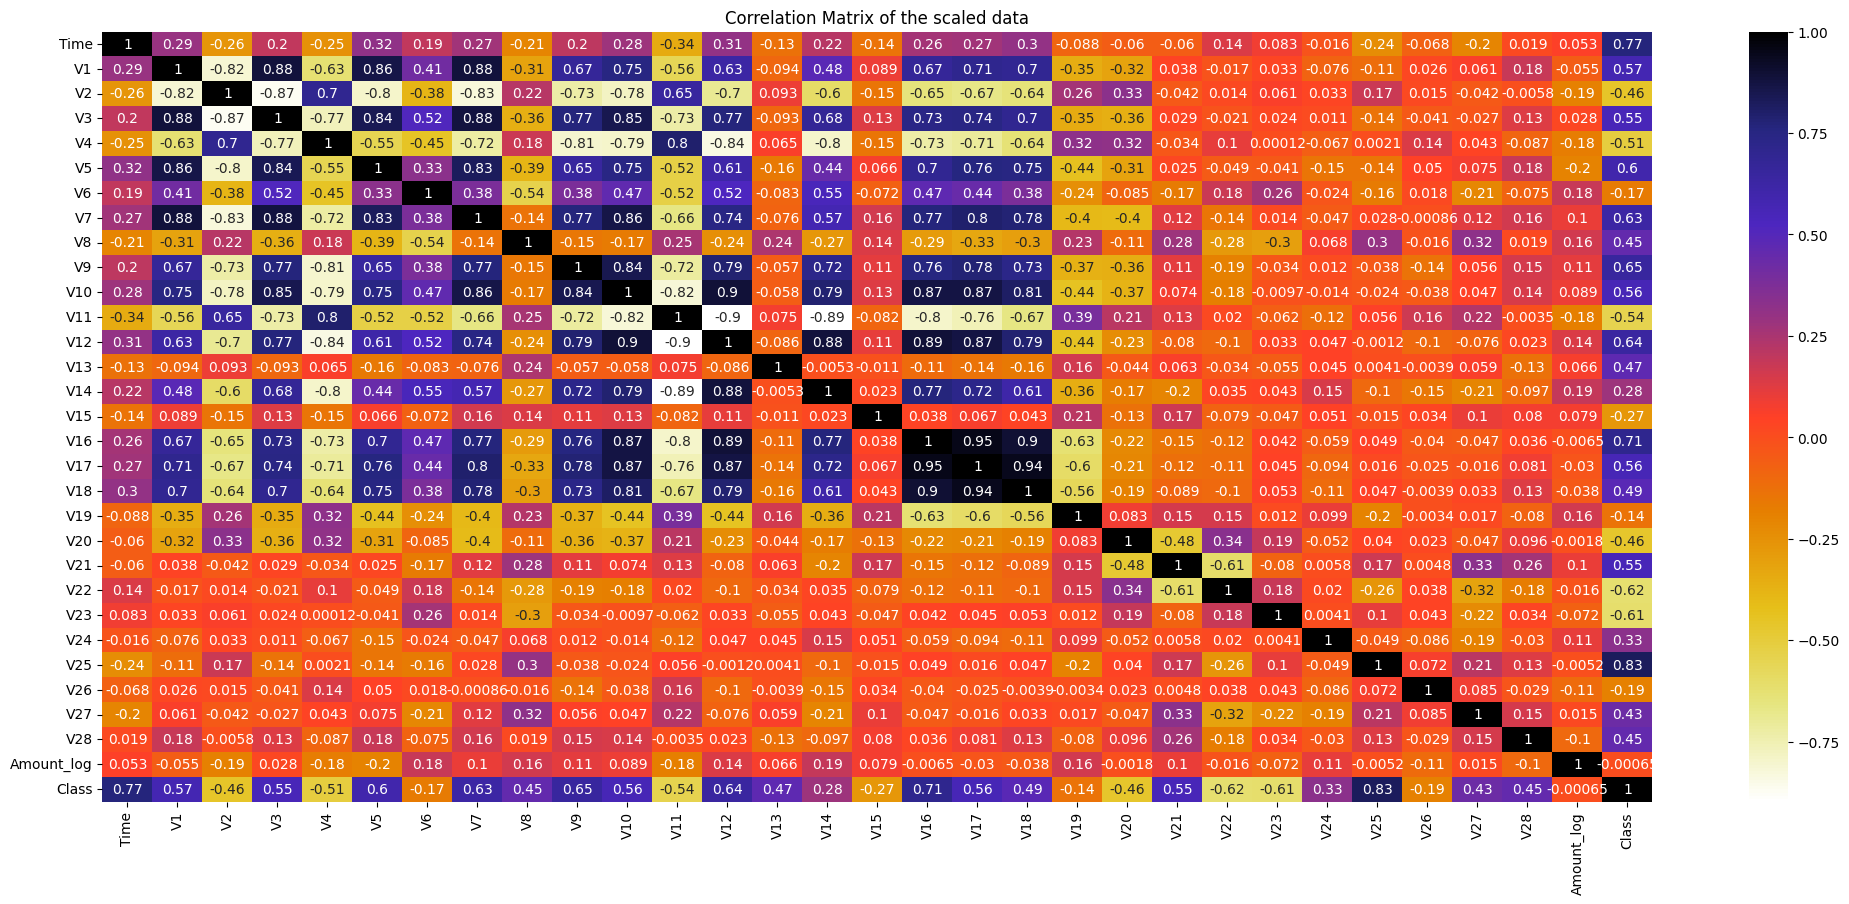

In [122]:
plt.figure(figsize=(25,10))
corr_df = df_train_scaled.corr()
sns.heatmap(corr_df,annot=True,cmap=plt.cm.CMRmap_r)
plt.title("Correlation Matrix of the scaled data")
plt.show()

In [123]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [124]:
corr_features = correlation(X_train_scaled, 0.8)
len(set(corr_features))

12

In [125]:
corr_features


{'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V2', 'V3', 'V5', 'V7', 'V9'}

In [126]:
X_train_scaled.drop(corr_features,axis=1,inplace=True)
X_test_scaled.drop(corr_features,axis=1,inplace=True)

In [128]:
print(f'training data set shape: {X_train_scaled.shape}')
print(f'test data set shape: {X_test_scaled.shape}')

training data set shape: (756, 18)
test data set shape: (190, 18)


* the data features provides very distinct information, which reduces redundancy and ensures a more diverse set of inputs for our modeling process.

# __Model Training:__

* here we will again split the training data into training and validation data for finding the best model.

In [129]:
df_train_scaled # training data set
X_test_scaled # test data set
y_test # test output

167184    1
76057     0
30496     1
160839    0
255403    1
         ..
259508    0
943       0
84543     1
99506     1
94689     0
Name: Class, Length: 190, dtype: int64

In [130]:
X_val_train, X_val, y_val_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.25, random_state=42)

In [131]:
len(X_val_train)

567

In [132]:
len(X_val)

189

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_curve, auc
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV

In [134]:
# base model: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_val_train, y_val_train)

LogisticRegression()

In [135]:
y_lr_train_pred = lr_model.predict(X_val_train)
y_lr_test_pred = lr_model.predict(X_val)

In [136]:
def calculate_metrics(y_t,y_p):

  accuracy_lr = accuracy_score(y_t, y_p)
  precision_lr = precision_score(y_t, y_p)
  recall_lr = recall_score(y_t, y_p)
  f1_lr = f1_score(y_t, y_p)

  return [accuracy_lr,precision_lr,recall_lr,f1_lr]

In [137]:
lr_train = calculate_metrics(y_val_train,y_lr_train_pred)
lr_val = calculate_metrics(y_val,y_lr_test_pred)

In [138]:
print(f'training Accuracy: {lr_train[0]}, validation Accuracy:{lr_val[0]}')
print(f'training Precision: {lr_train[1]}, validation Precision: {lr_val[1]}')
print(f'training Recall: {lr_train[2]} , validation Recall: {lr_val[2]}')
print(f'training F1 Score: {lr_train[3]}, validation F1 score: {lr_val[3]}')

training Accuracy: 0.9012345679012346, validation Accuracy:0.8677248677248677
training Precision: 0.9450980392156862, validation Precision: 0.9861111111111112
training Recall: 0.8515901060070671 , validation Recall: 0.7473684210526316
training F1 Score: 0.8959107806691449, validation F1 score: 0.8502994011976047


In [139]:
from sklearn.svm import SVC

In [140]:
model = SVC(random_state=42)

In [141]:
model.fit(X_val_train, y_val_train)

SVC(random_state=42)

In [142]:
y_svm_test_pred = model.predict(X_val)

In [143]:
print(f'training Accuracy: {accuracy_score(y_val_train,model.predict(X_val_train))}, validation Accuracy:{accuracy_score(y_val,y_svm_test_pred)}')
print(f'training Precision: {precision_score(y_val_train,model.predict(X_val_train))}, validation Precision: {precision_score(y_val,y_svm_test_pred)}')
print(f'training Recall: {recall_score(y_val_train,model.predict(X_val_train))}, validation Recall: {recall_score(y_val,y_svm_test_pred)}')
print(f'training F1 Score: {f1_score(y_val_train,model.predict(X_val_train))}, validation F1 score: {f1_score(y_val,y_svm_test_pred)}')

training Accuracy: 0.9294532627865961, validation Accuracy:0.8783068783068783
training Precision: 0.9655172413793104, validation Precision: 0.95
training Recall: 0.8904593639575972, validation Recall: 0.8
training F1 Score: 0.926470588235294, validation F1 score: 0.8685714285714285


In [144]:
rf = RandomForestClassifier()
rf.fit(X_val_train, y_val_train)

RandomForestClassifier()

In [145]:
y_rf_train_pred = rf.predict(X_val_train)
y_rf_test_pred = rf.predict(X_val)

In [146]:
print(f'training Accuracy: {accuracy_score(y_val_train,y_rf_train_pred)}, validation Accuracy:{accuracy_score(y_val,y_rf_test_pred)}')
print(f'training Precision: {precision_score(y_val_train,y_rf_train_pred)}, validation Precision: {precision_score(y_val,y_rf_test_pred)}')
print(f'training Recall: {recall_score(y_val_train,y_rf_train_pred)}, validation Recall: {recall_score(y_val,y_rf_test_pred)}')
print(f'training F1 Score: {f1_score(y_val_train,y_rf_train_pred)}, validation F1 score: {f1_score(y_val,y_rf_test_pred)}')

training Accuracy: 1.0, validation Accuracy:0.8994708994708994
training Precision: 1.0, validation Precision: 0.9318181818181818
training Recall: 1.0, validation Recall: 0.8631578947368421
training F1 Score: 1.0, validation F1 score: 0.8961748633879781


In [147]:
import xgboost as xgb


In [148]:
model_bg = xgb.XGBClassifier( random_state=42)


In [149]:
model_bg.fit(X_val_train, y_val_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [150]:
print(f'training Accuracy: {accuracy_score(y_val_train,model_bg.predict(X_val_train))}, validation Accuracy:{accuracy_score(y_val,model_bg.predict(X_val))}')
print(f'training Precision: {precision_score(y_val_train,model_bg.predict(X_val_train))}, validation Precision: {precision_score(y_val,model_bg.predict(X_val))}')
print(f'training Recall: {recall_score(y_val_train,model_bg.predict(X_val_train))}, validation Recall: {recall_score(y_val,model_bg.predict(X_val))}')
print(f'training F1 Score: {f1_score(y_val_train,model_bg.predict(X_val_train))}, validation F1 score: {f1_score(y_val,model_bg.predict(X_val))}')

training Accuracy: 1.0, validation Accuracy:0.8677248677248677
training Precision: 1.0, validation Precision: 0.9069767441860465
training Recall: 1.0, validation Recall: 0.8210526315789474
training F1 Score: 1.0, validation F1 score: 0.861878453038674


# __Performance of Base models on training and validation data:__
Here we consider F1 score as metric to train the best model, as for credit card fraud detection, both __Type I__ error and __Type II__ error plays important role.
* __Logistic Regression: 0.597__
* __Support Vector Classifier: 0.819__
* __Random Forest Classifier: 0.865__
* __XGBoost Classifier: 0.864__

# __Hyperparameter Tuning__:

To better the performance of the base models we use Hyperparameter tuning to find the best set of hyperparameters of the models.

In [164]:
def tuning(estimator,paramters,scoring,x_train,y_train):
  grid_search  = RandomizedSearchCV(estimator = estimator,
                            param_distributions = paramters,
                            scoring = scoring,
                            n_iter = 100,
                            cv = 3,
                            n_jobs = -1)
  grid_search = grid_search.fit(x_train, y_train)
  return grid_search

* __Logistic Regression__

In [175]:
def print_res(model,X,y):
  print(f'validation Accuracy:{accuracy_score(y,model.predict(X))}')
  print(f'validation Precision: {precision_score(y,model.predict(X))}')
  print(f'validation Recall: {recall_score(y,model.predict(X))}')
  print(f'validation F1 score: {f1_score(y,model.predict(X))}')

In [162]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 5),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [165]:
lr_hyper = tuning(LogisticRegression(),param_grid,'f1',X_val_train,y_val_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
138 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(it

In [176]:
print_res(lr_hyper,X_val,y_val)

validation Accuracy:0.8677248677248677
validation Precision: 0.926829268292683
validation Recall: 0.8
validation F1 score: 0.8587570621468926


In [177]:
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [178]:
svc_hyper = tuning(SVC(),param_grid_svc,'f1',X_val_train,y_val_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 25 is smaller than n_iter=100. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [179]:
print_res(svc_hyper,X_val,y_val)

validation Accuracy:0.8888888888888888
validation Precision: 0.9404761904761905
validation Recall: 0.8315789473684211
validation F1 score: 0.88268156424581


In [180]:
param_grid_rf = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [181]:
rfc_hyper = tuning(RandomForestClassifier(),param_grid_rf,'f1',X_val_train,y_val_train)

In [182]:
print_res(rfc_hyper,X_val,y_val)

validation Accuracy:0.8888888888888888
validation Precision: 0.9512195121951219
validation Recall: 0.8210526315789474
validation F1 score: 0.8813559322033899


In [183]:
lr_confusion = confusion_matrix(y_val,lr_hyper.predict(X_val))
svc_confusion = confusion_matrix(y_val,svc_hyper.predict(X_val))
rfc_confusion = confusion_matrix(y_val,rfc_hyper.predict(X_val))

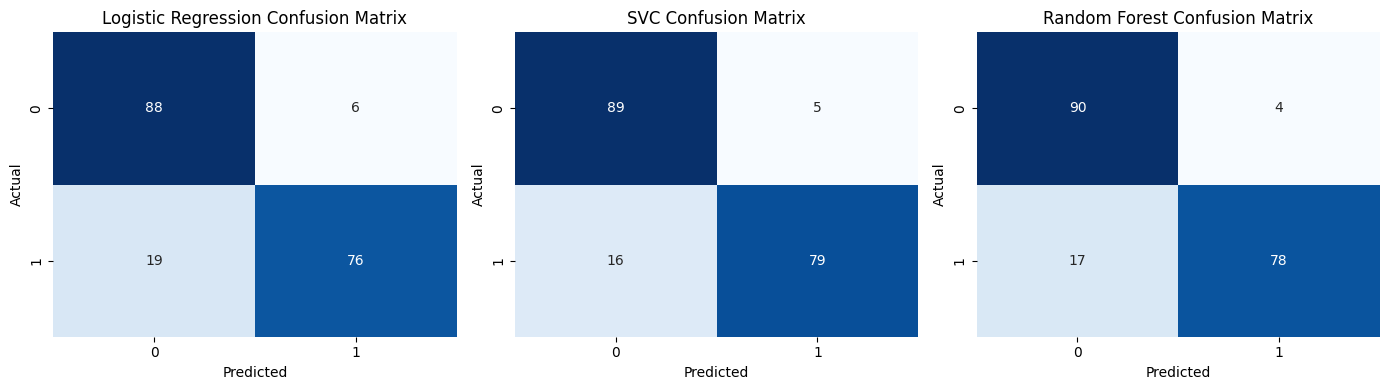

In [187]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
sns.heatmap(lr_confusion, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
sns.heatmap(svc_confusion, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
sns.heatmap(rfc_confusion, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

* here both SVC and RFC both are performing well on the training and validation data.

In [204]:
rfc_hyper.best_params_

{'n_estimators': 50,
 'max_leaf_nodes': 9,
 'max_features': 'log2',
 'max_depth': 9}

In [206]:
svc_model = SVC(kernel = svc_hyper.best_params_['kernel'],gamma = svc_hyper.best_params_['gamma'],C = svc_hyper.best_params_['C'],random_state=42)
rfc_model = RandomForestClassifier(n_estimators=rfc_hyper.best_params_['n_estimators'],max_leaf_nodes=rfc_hyper.best_params_['max_leaf_nodes'],max_features=rfc_hyper.best_params_['max_features'],max_depth = rfc_hyper.best_params_['max_depth'],random_state=42)

In [207]:
svc_model.fit(X_train_scaled,y_train)
rfc_model.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50, random_state=42)

In [208]:
print_res(rfc_model,X_test_scaled,y_test)

validation Accuracy:0.8947368421052632
validation Precision: 0.9120879120879121
validation Recall: 0.8736842105263158
validation F1 score: 0.8924731182795699


In [209]:
print_res(svc_model,X_test_scaled,y_test)

validation Accuracy:0.8947368421052632
validation Precision: 0.9032258064516129
validation Recall: 0.8842105263157894
validation F1 score: 0.8936170212765957


In [210]:
svc_conf = confusion_matrix(y_test,svc_model.predict(X_test_scaled))
rfc_conf = confusion_matrix(y_test,rfc_model.predict(X_test_scaled))

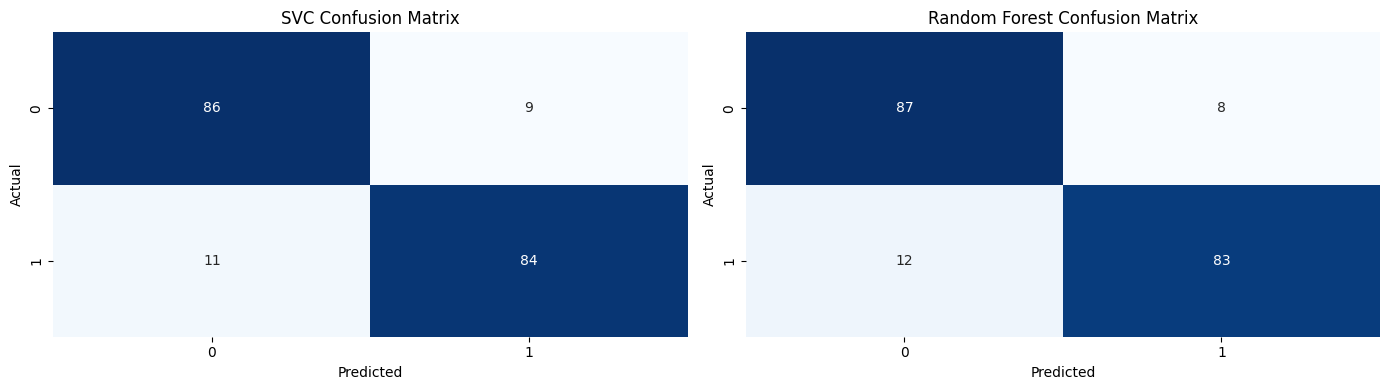

In [211]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.heatmap(svc_conf, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(rfc_conf, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()